In [ ]:
!git clone https://github.com/DrYogurt/Aero-Design-Team-Gamma.git
!pip install poetry==1.4.2

In [ ]:
%cd Aero-Design-Team-Gamma
!poetry config virtualenvs.in-project true
!poetry install --no-ansi

In [ ]:
VENV_PATH = "/content/Aero-Design-Team-Gamma/.venv/lib/python3.11/site-packages"
import os, sys
LOCAL_VENV_PATH = '/content/venv' # local notebook
os.symlink(VENV_PATH, LOCAL_VENV_PATH) # connect to directory in drive
sys.path.insert(0, LOCAL_VENV_PATH)

# Stability Trade Studies
We begin by creating the aircraft and setting it's mass/ moments of inertia

In [5]:
from aircraft_design.final_design.final_construction import Aircraft
from aircraft_design.analysis.mass_analysis import MassAnalysis, MassFeature
import copy
from pprint import pprint

aircraft = Aircraft()

# for each child of aircraft, remove the mass component
for child in aircraft.children:
    child.remove_feature(MassFeature())
    child.remove_analysis(MassAnalysis())


mass_lb = 1.6e6
cg_x_in = 165.51*12
cg_y_in = 9.6*12
cg_z_in = 14.6*12
ixx_lb_in2 = 190783985 * 144
iyy_lb_in2 = 4712538690 * 144
izz_lb_in2 = 4555443127 * 144
ixy_lb_in2 = 400610 * 144
ixz_lb_in2 = -59831083 * 144
iyz_lb_in2 = 69325 * 144

overall_mass_feature = MassFeature(
            mass=mass_lb,
            center_of_gravity=[cg_x_in / 12, cg_y_in / 12, cg_z_in / 12],
            ixx=ixx_lb_in2 / 144,
            iyy=iyy_lb_in2 / 144,
            izz=izz_lb_in2 / 144,
            ixy=ixy_lb_in2 / 144,
            ixz=ixz_lb_in2 / 144,
            iyz=iyz_lb_in2 / 144
        )

aircraft.add_feature(overall_mass_feature)
aircraft.add_analysis(MassAnalysis())


# Change to root directory to ensure plots are saved in the correct location
import os
current_dir = os.getcwd()
# Find the root directory by looking for .git folder
root_dir = current_dir
while not os.path.exists(os.path.join(root_dir, '.git')) and root_dir != '/':
    root_dir = os.path.dirname(root_dir)
    
# Change to root directory if found, otherwise stay in current directory
if os.path.exists(os.path.join(root_dir, '.git')):
    os.chdir(root_dir)
    print(f"Changed working directory to: {root_dir}")
else:
    print(f"Staying in current directory: {current_dir}")

Changed working directory to: /home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma


## Static Stability
This trade study calculates and returns some important static stability values. Since we're manually setting the mass, run this twice with/without fuel in the mass estimates and assume we can keep the CG close enough

In [6]:
from aircraft_design.final_design.final_trade_studies.static_stability_trade_study import analyze_aircraft_static_stability
from aircraft_design.final_design.final_trade_studies.static_margin_analysis import static_margin_at_full_and_empty
# copy aircraft
aircraft_static_stability_copy = copy.deepcopy(aircraft)

aircraft_params, analysis_results = analyze_aircraft_static_stability(aircraft_static_stability_copy)
full_static_margin, empty_static_margin, full_cg_position, empty_cg_position = static_margin_at_full_and_empty()
#print(f"Full fuel static margin: {full_static_margin:.2f}")
print(f"Empty fuel static margin: {empty_static_margin:.2f}")
#print(f"Full fuel CG position: {full_cg_position:.2f} ft")
print(f"Empty fuel CG position: {empty_cg_position:.2f} ft")

pprint(analysis_results['stability_analyses']['longitudinal_stability'])

Empty fuel static margin: 0.72
Empty fuel CG position: 149.31 ft
{'CD_0': 0.017,
 'CD_alpha': 0.20639922342234715,
 'CD_total': 0.0422164221559555,
 'CL_0': -0.053656724551663516,
 'CL_alpha': 5.40451677525609,
 'CL_total': 0.6066295609007327,
 'CM_0': 0.0038205672231502452,
 'CM_alpha': -1.29215171618019,
 'CM_total': -0.154045545955327,
 'VH': 0.25723580586743444,
 'h_n': 1.7447348850153037,
 'it': 0.11918750000000009,
 'static_margin': 0.23908737263915003}


/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/static_stability.py:776: RuntimeWarning: invalid value encountered in scalar divide
  'Cl_delta_a': Cl_delta_a/delta_a,  # Derivative


## Dynamic Stability - Dimensionless Params
This trade study calculates the dimensionless derivatives for dynamic stability, and calculates the steady roll rate (which should be at least 0.6.

In [9]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import create_stability_parameters

aircraft_dynamic_stability_copy = copy.deepcopy(aircraft)

aircraft_params, stability_params, dimensionless_derivatives = create_stability_parameters(aircraft_dynamic_stability_copy)
print("Dimensionless derivatives:")
pprint(dimensionless_derivatives)
dimensionless_roll_rate = dimensionless_derivatives['C_l_delta_a'] / dimensionless_derivatives['C_l_p']
steady_roll_rate = dimensionless_roll_rate * 2 * aircraft_params['airspeed'] / aircraft_params['wingspan']

print(f"Steady roll rate: {steady_roll_rate:.2f} deg/s/deg")


Dimensionless derivatives:
{'C_M_alpha': -1.29215171618019,
 'C_M_alpha_dot': -1.6591297235307745,
 'C_M_delta': -0.3607305454052778,
 'C_M_q': -4.247259591497654,
 'C_M_u': 0.0,
 'C_N_beta': 0.1342066442414374,
 'C_N_delta_a': 0.009074728150197248,
 'C_N_delta_r': -0.04697232548450309,
 'C_N_p': -0.07363944810125837,
 'C_N_r': -0.39702870088331516,
 'C_X_alpha': 0.40023033747838554,
 'C_X_alpha_dot': 0,
 'C_X_delta': -0.014665116354366346,
 'C_X_q': 0,
 'C_X_u': -0.0422164221559555,
 'C_Y_beta': -0.620156271906901,
 'C_Y_delta_a': 0,
 'C_Y_delta_r': 0.21705469516741535,
 'C_Y_p': -0.10208333693940759,
 'C_Y_r': 0.1342066442414374,
 'C_Z_alpha': -5.446733197412045,
 'C_Z_alpha_dot': -0.805223438345939,
 'C_Z_delta': -0.17507292285108397,
 'C_Z_q': -2.0613174023158733,
 'C_Z_u': -0.6066295609007327,
 'C_l_beta': -0.4732254361124236,
 'C_l_delta_a': -0.1716558218152039,
 'C_l_delta_r': 0.008642443768600136,
 'C_l_p': -1.0021589795998074,
 'C_l_r': 0.3733290301837485}
Steady roll rate: 1.

/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/aircraft_design/analysis/static_stability.py:776: RuntimeWarning: invalid value encountered in scalar divide
  'Cl_delta_a': Cl_delta_a/delta_a,  # Derivative


## Dynamic Stability - Frequencies, Damping Ratios and Time Constants
This trade study calculates and returns all the values for ensuring first order dynamic stability 

Aircraft Longitudinal Dynamics

  1004.8 :V0 (ft/s) level cruise
 --- longitudinal aerodynamic stability derivatives ---
     -0.00020   -0.00285    0.00000    0.00000
      0.00188   -0.02558   -0.00006    0.00000
    -35.06719 1003.92122   -0.00598    1.00000
    -32.17399   -0.01960   -0.00000    0.00000
 --- control derivatives ---
     -0.06922    0.00000
     -0.82624    0.00000
     -0.01818    0.00000
      0.00000    0.00000
 --- time array --- 
  0 0.01 100 :i.e. t=(0:0.01:100)
 --- step inputs ---
       0.3491 :elevator deflection, eta (rad) [1 deg = 0.0175 rad]
      10.0000 :engine thrust increment, tau
 --- feedback control ---
    0.0     0.0  :axial velocity gains (eta tau)
    0.0     0.0  :normal velocity gains
    0.0     0.0  :pitch rate gains
    0.0     0.0  :pitch attitude gains
 --- end ---

[A]:
 -1.9830e-04 -2.8492e-03  4.7635e-09 -3.2174e+01
  1.8800e-03 -2.5582e-02 -6.4783e-05 -1.9600e-02
 -3.5067e+01  1.0039e+03 -5.9788e-03 -3.2768e-08
  0.0000e+00  0.0000

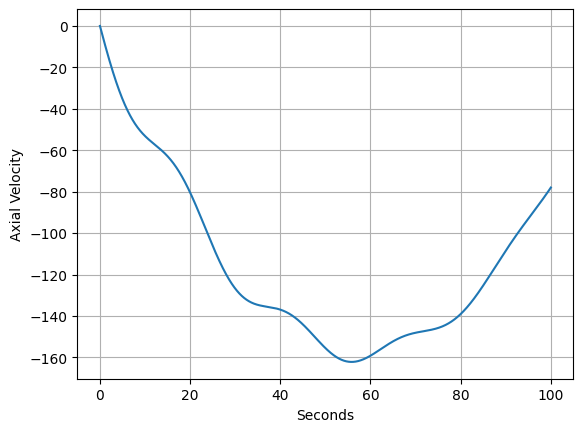

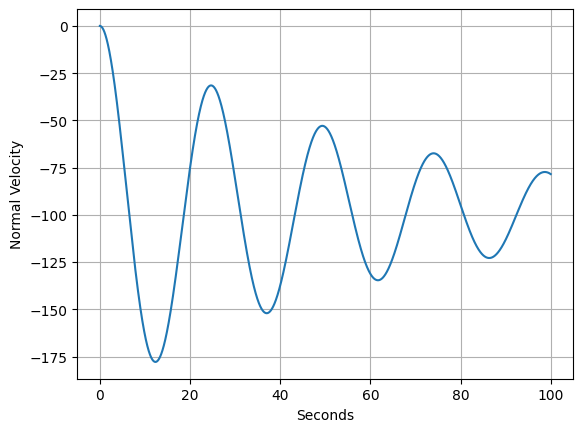

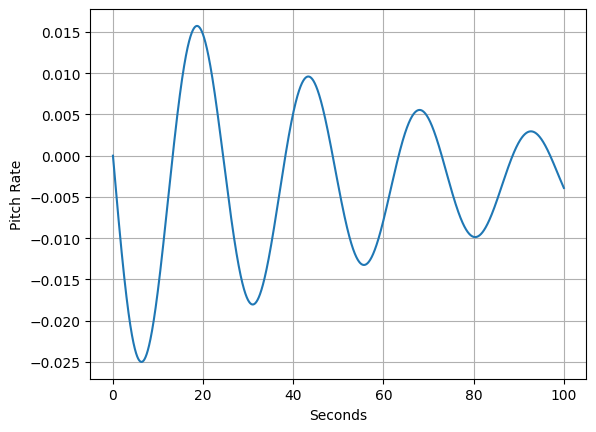

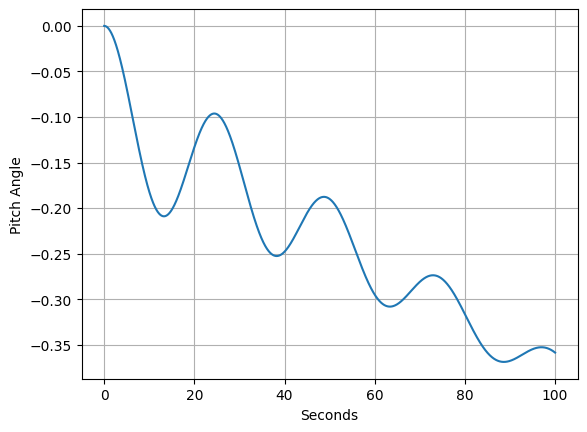

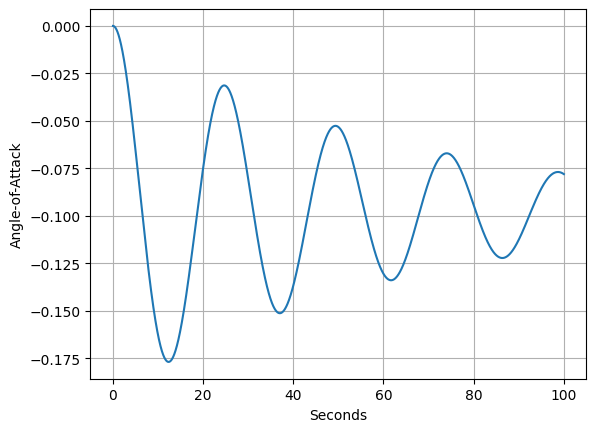

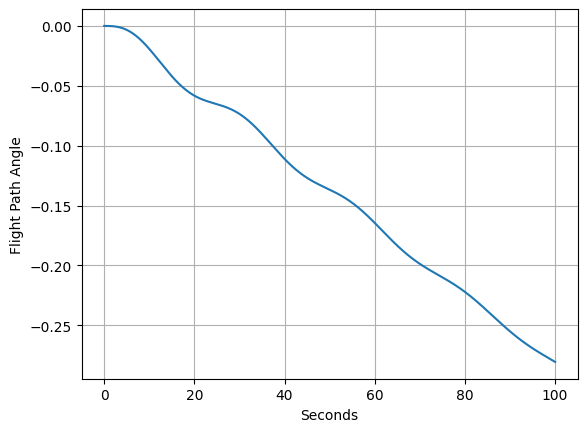

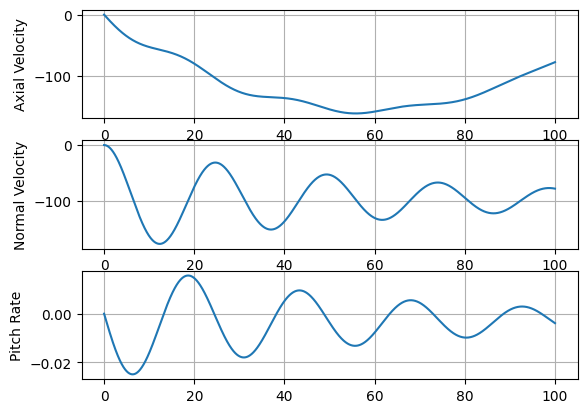

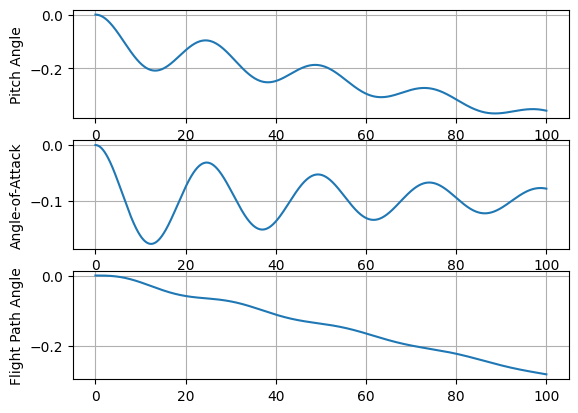

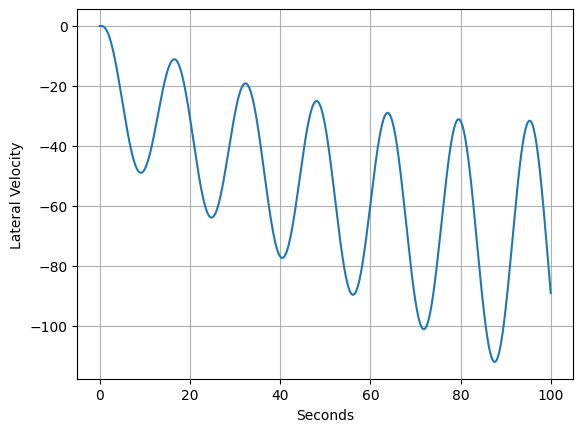

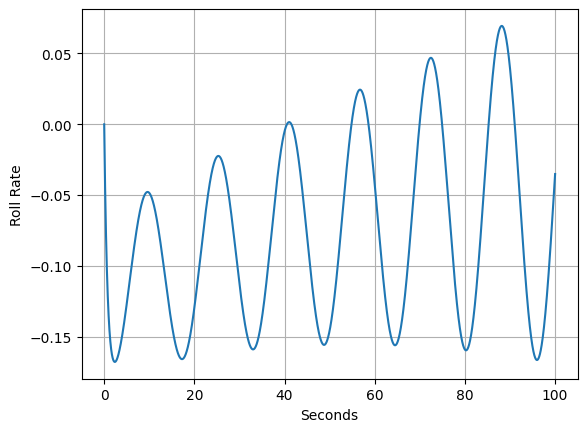

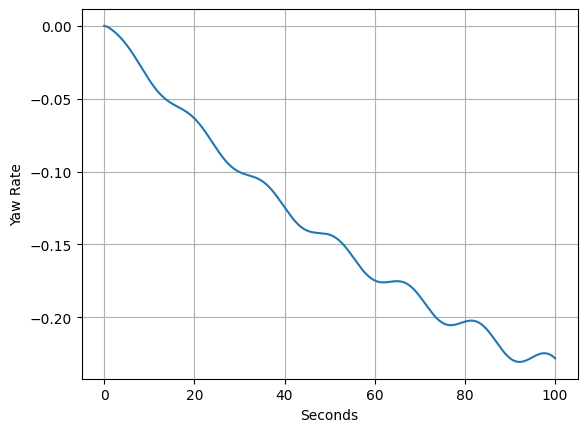

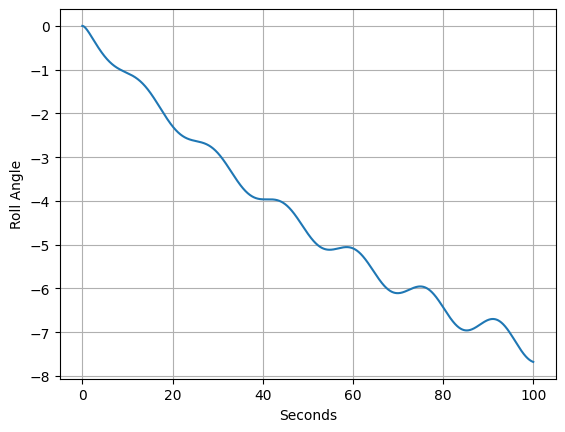

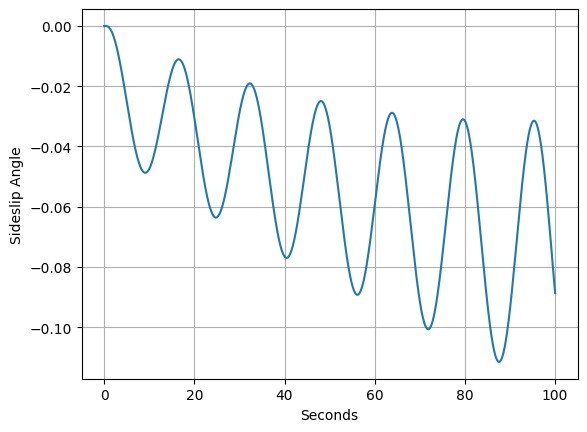

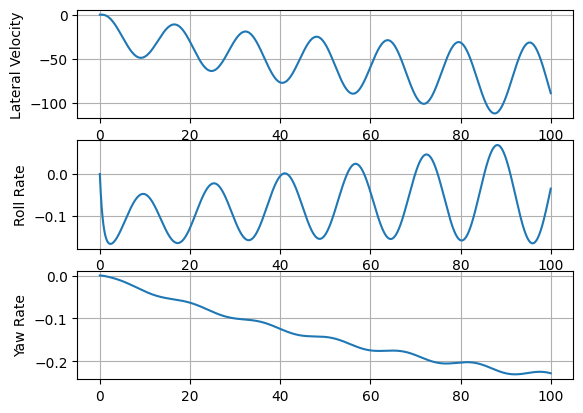

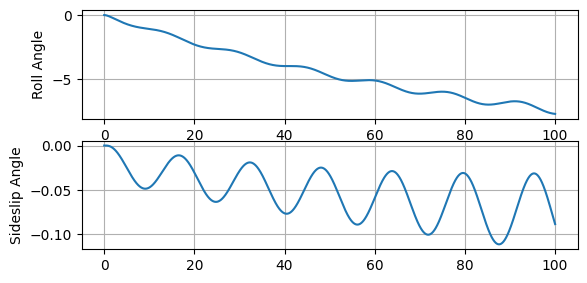

In [11]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import analyze_aircraft_dynamic_stability

aircraft_dynamic_stability_copy = copy.deepcopy(aircraft)



# find passive values
short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft_dynamic_stability_copy, visualize=True)

print(f"====== Passive values ====== \n short_nf: {short_nf:.2f}, short_df: {short_df:.2f}, p_nf: {p_nf:.2f}, p_df: {p_df:.2f}, dnf: {dnf:.2f}, ddr: {ddr:.2f}, Tr: {Tr:.2f}, Ts: {Ts:.2f}")

# currently these gains are bad
test_gains = {
        'ku': [0.5, 1], 'kw': [0, -0.5], 'kq': [0, -0.5], 'ko_long': [0.5, -0.5],
        'kv': [0, 0], 'kp': [-0.25, 0.25], 'kr': [0.5, 0], 'ko_lat': [0.75, -0.25]
    }

# find augmented values
#short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft_dynamic_stability_copy, **test_gains, visualize=True)
#print(f"====== Augmented values ====== \n short_nf: {short_nf:.2f}, short_df: {short_df:.2f}, p_nf: {p_nf:.2f}, p_df: {p_df:.2f}, dnf: {dnf:.2f}, ddr: {ddr:.2f}, Tr: {Tr:.2f}, Ts: {Ts:.2f}")

